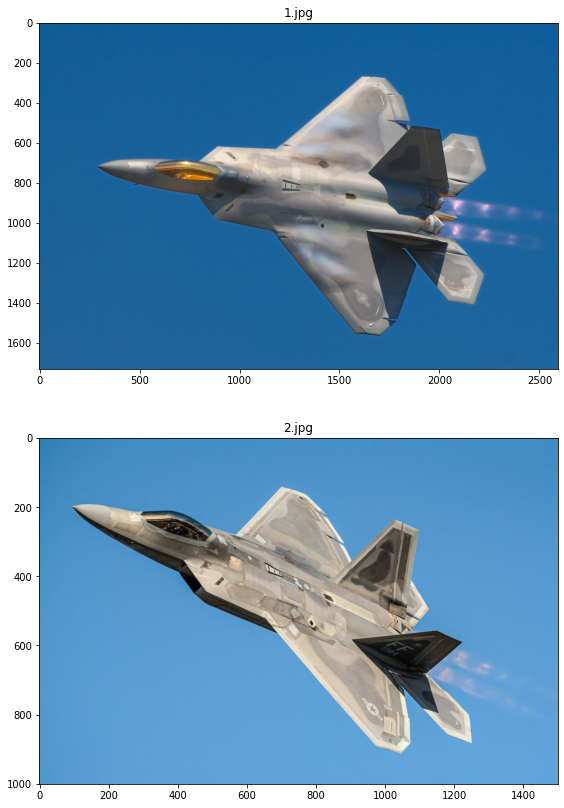

In [1]:
import matplotlib.pyplot as plt
import cv2, os
import numpy as np
dir_images = "media/"
imgs = os.listdir(dir_images)

fig = plt.figure(figsize=(20,14))
for count, imgnm in enumerate(imgs,1):
    image = plt.imread(os.path.join(dir_images,imgnm))
    ax = fig.add_subplot(2,int(len(imgs)/2),count)
    ax.imshow(image)
    ax.set_title(imgnm)
plt.show()

![Рис. 1](1.jpg)

In [2]:
def getLDBimage(gray_image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLDB = np.zeros_like(gray_image)
    neighboor = 3
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):

            img = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center = img[1,1]
            img01  = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            img01_vector = np.delete(img01_vector,4)

            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLDB[ih+1,iw+1] = num
    return(imgLDB)

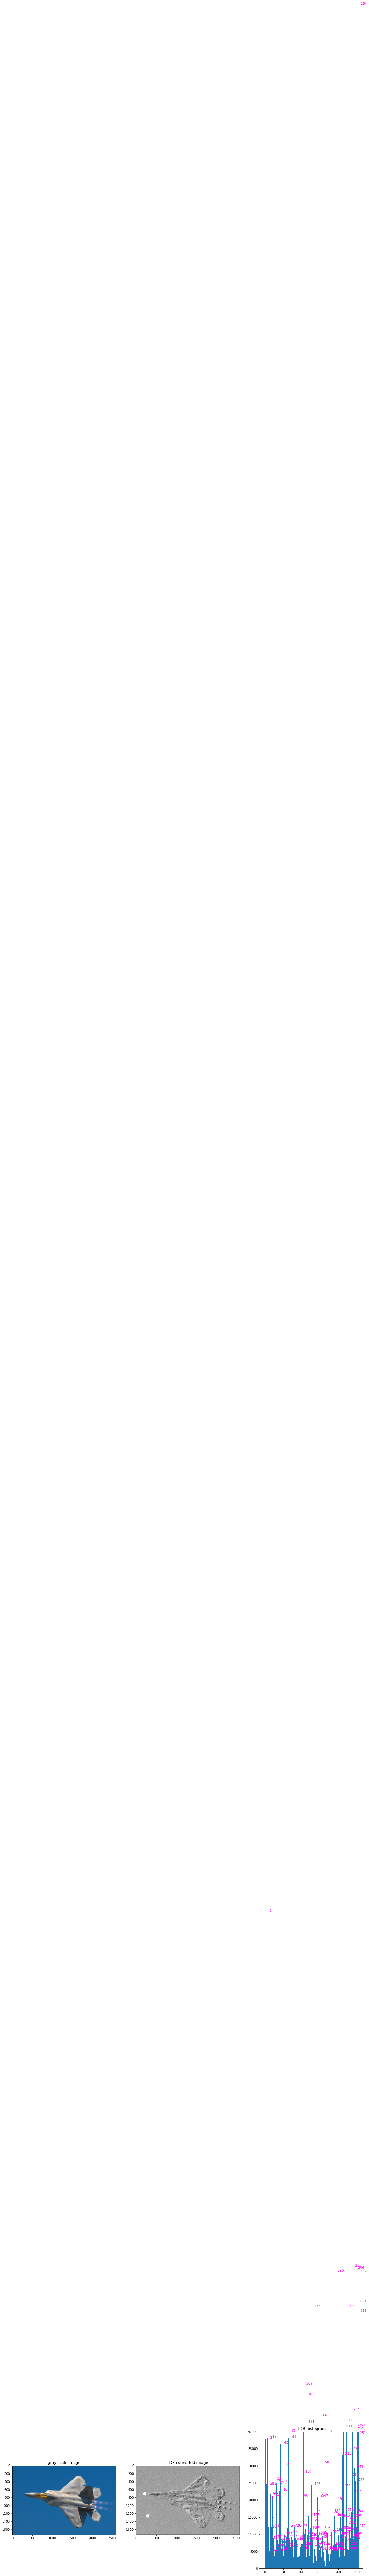

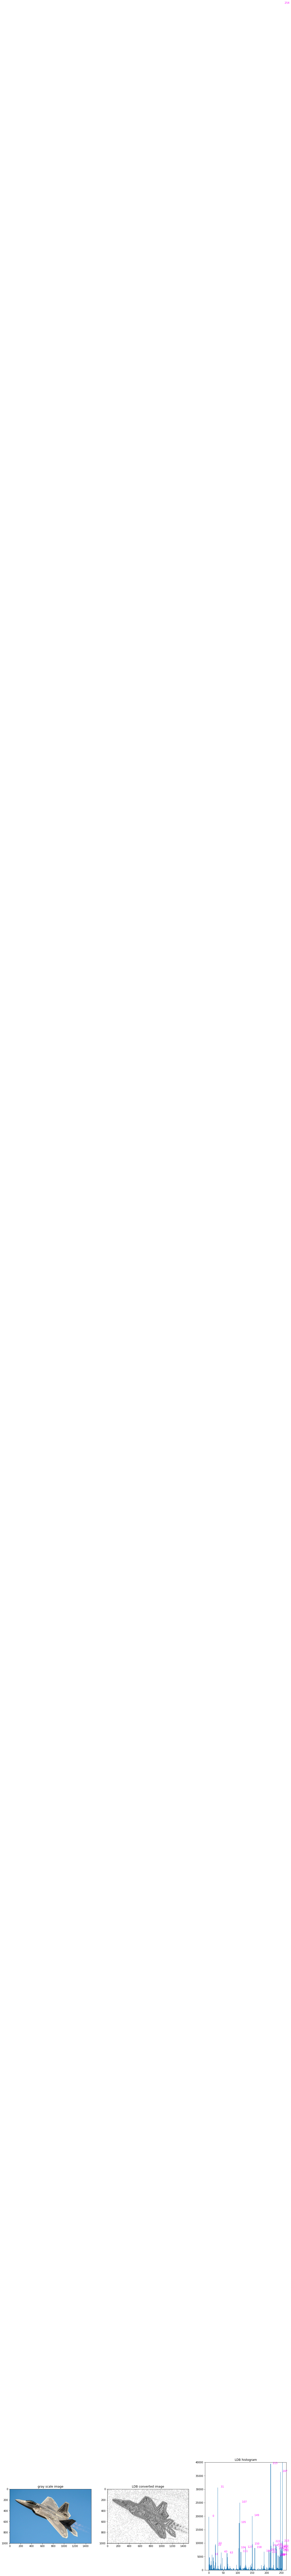

In [6]:
dir_images = "media/"
imgs = os.listdir(dir_images)
for imgnm in imgs:
    image = plt.imread(os.path.join(dir_images,imgnm))

    imgLDB    = getLDBimage(image)
    vecimgLDB = imgLDB.flatten()

    fig = plt.figure(figsize=(20,8))
    ax  = fig.add_subplot(1,3,1)
    ax.imshow(image)
    ax.set_title("gray scale image")
    ax  = fig.add_subplot(1,3,2)
    ax.imshow(imgLDB,cmap="gray")
    ax.set_title("LDB converted image")
    ax  = fig.add_subplot(1,3,3)
    freq,LDB, _ = ax.hist(vecimgLDB,bins=2**8)
    ax.set_ylim(0,40000)
    LDB = LDB[:-1]

    largeTF = freq > 5000
    for x, fr in zip(LDB[largeTF],freq[largeTF]):
        ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
    ax.set_title("LDB histogram")
    plt.show()

In [4]:

import cv2
import numpy as np

def getLDBimage(gray_image):

    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
    imgLDB = np.zeros_like(gray_image)
    neighboor = 3
    for ih in range(0, gray_image.shape[0] - neighboor):
        for iw in range(0, gray_image.shape[1] - neighboor):

            img = gray_image[ih:ih + neighboor, iw:iw + neighboor]
            center = img[1, 1]
            img01 = (img >= center) * 1.0
            img01_vector = img01.T.flatten()

            img01_vector = np.delete(img01_vector, 4)

            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2 ** where_img01_vector)
            else:
                num = 0
            imgLDB[ih + 1, iw + 1] = num
    return imgLDB


input_image = cv2.imread('media/1.jpg')
template_image = cv2.imread('media/2.jpg')


input_LDB = getLDBimage(input_image)
template_LDB = getLDBimage(template_image)


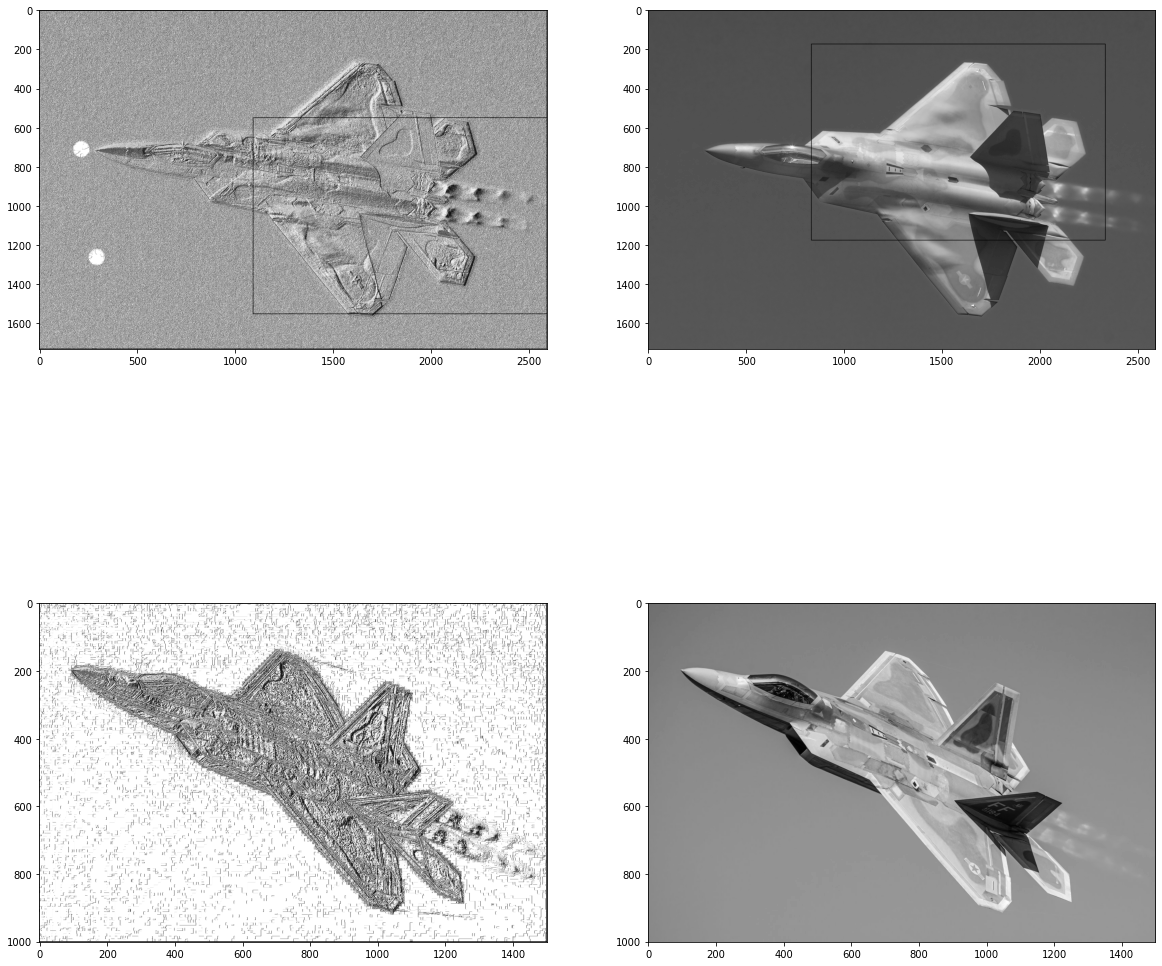

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
input_image_gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
template_image_gray_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
def rec(input, template):
    result = cv2.matchTemplate(input, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    h, w = template_LDB.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(input, top_left, bottom_right, (0, 0, 255), 2)
    return input

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plt.figure(figsize=(8, 6))
axs[0, 0].imshow( rec(input_LDB, template_LDB),cmap='gray')
axs[1, 0].imshow(template_LDB,cmap='gray')

plt.figure(figsize=(8, 6))
axs[0, 1].imshow( rec(input_image_gray_image, template_image_gray_image),cmap='gray')
axs[1, 1].imshow(template_image_gray_image,cmap='gray')
plt.show()
